# Importing Needed packages

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# Downloading Data

In [158]:
df = pd.read_csv('data.csv')

# take a look at the dataset
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


## Data Exploration

In [61]:
# summarize the data
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


## Trim whitespace from ends of each value across all series in dataframem

In [62]:
def trim_all_columns(df):
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

## Clear Data

In [160]:
df = trim_all_columns(df)

df = df[~df['Address'].isnull()].reset_index(drop=True)

df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df = df[df['Area'] < 300].reset_index(drop=True)

le = LabelEncoder()
df['Parking'] = le.fit_transform(df['Parking'])
df['Warehouse'] = le.fit_transform(df['Warehouse'])
df['Elevator'] = le.fit_transform(df['Elevator'])


location = dict()
location_Count = dict()
for i in range(0, len(df)):
    location[df['Address'][i]] = int(location.get(df['Address'][i] , 0)) + (int(df['Price'][i] / df['Area'][i]))
    location_Count[df['Address'][i]] = int(location_Count.get(df['Address'][i] , 0)) + 1
    
for i in range(0, len(df)):
    df['Address'][i] = int(int(location.get(df['Address'][i] , 0)) / int(location_Count.get(df['Address'][i] , 0)))
    
df.describe()

C:\Users\B_Ameri\AppData\Local\Temp\ipykernel_13760\2937302575.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'][i] = int(int(location.get(df['Address'][i] , 0)) / int(location_Count.get(df['Address'][i] , 0)))


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
count,3378.000000,3378.000000,3378.000000,3378.000000,3378.000000,3.378000e+03,3.378000e+03,3.378000e+03
mean,99.749260,2.047069,0.845767,0.915927,0.793961,4.031696e+07,4.755643e+09,1.585214e+05
std,44.055517,0.712326,0.361226,0.277539,0.404519,2.532975e+07,5.803832e+09,1.934611e+05
min,30.000000,0.000000,0.000000,0.000000,0.000000,4.166666e+06,3.600000e+06,1.200000e+02
25%,68.000000,2.000000,1.000000,1.000000,1.000000,2.279330e+07,1.382500e+09,4.608333e+04
50%,90.000000,2.000000,1.000000,1.000000,1.000000,3.658525e+07,2.800000e+09,9.333333e+04
75%,119.000000,2.000000,1.000000,1.000000,1.000000,5.709124e+07,5.700000e+09,1.900000e+05
max,290.000000,5.000000,1.000000,1.000000,1.000000,1.274156e+08,5.750000e+10,1.916667e+06


### Let's select some features to explore more.

In [161]:
cdf = df[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price']]
cdf.head(9)

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63.0,1,1,1,1,36368050,1.850000e+09
1,60.0,1,1,1,1,36368050,1.850000e+09
2,79.0,2,1,1,1,7900049,5.500000e+08
3,95.0,2,1,1,1,9818187,9.025000e+08
4,123.0,2,1,1,1,83190345,7.000000e+09
5,70.0,2,1,1,0,44672029,2.050000e+09
6,87.0,2,1,1,1,7900049,6.000000e+08
7,59.0,1,1,1,1,36368050,2.150000e+09
8,54.0,2,1,1,0,13202450,4.930000e+08


We can plot each of these features:

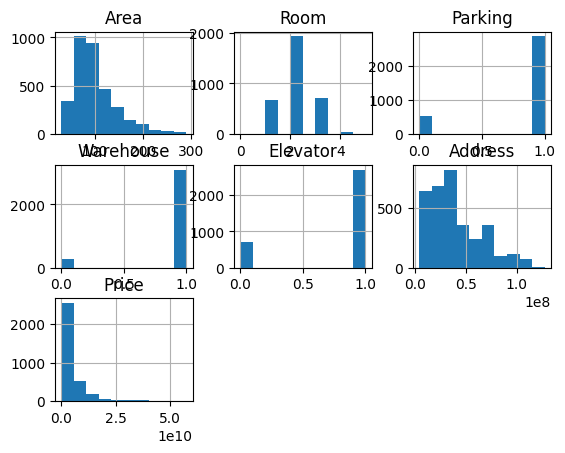

In [162]:
viz = cdf
viz.hist()
plt.show()

Now, let's plot each of these features against the Area, to see how linear their relationship is:

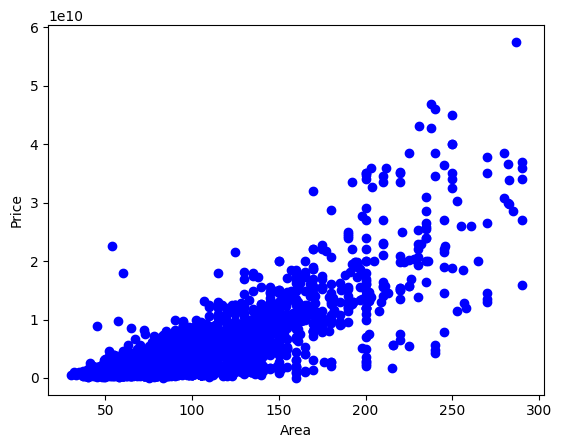

In [163]:
plt.scatter(cdf.Area, cdf.Price,  color='blue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

Creating train and test dataset

In [164]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.

### Train data distribution

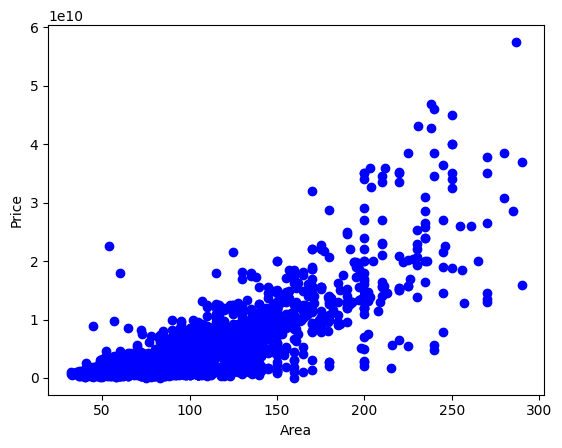

In [165]:
plt.scatter(train.Area, train.Price,  color='blue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

### Test data distribution

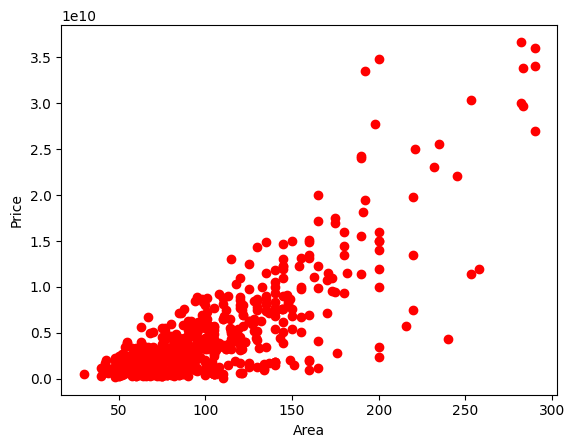

In [166]:
plt.scatter(test.Area, test.Price,  color='red')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

### Multiple Regression Model

In [167]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address']])
y = np.asanyarray(train[['Price']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 9.07531171e+07 -1.16845753e+09 -5.25373352e+08 -2.50651075e+08
  -5.38758405e+08  1.08923440e+02]]


### Practice

In [168]:
y_= regr.predict(test[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address']])
x = np.asanyarray(test[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address']])
y = np.asanyarray(test[['Price']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 5027422446914865152.00
Variance score: 0.82


C:\Users\B_Ameri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
